# Use existing surfaces

This notebook briefly presents how to use existing surfaces in place of the compute_surface from ArchPy

In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
pv.set_jupyter_backend('static')
import sys

sys.path.append("../../")
# sys.path.append("../../../../../Documents(sauvegarde)/Github/ArchPy")
#my modules
import ArchPy
import ArchPy.base
from ArchPy.base import *

## Build the arch table

First we need to build a table, depending on the geology of your site

In [2]:
PD = Pile(name = "PD", seed = 10)
PB = Pile(name = "PB", seed=1)
P1 = Pile(name = "P1", seed=1)

In [3]:
#grid
sx = 0.15
sy = 0.15
sz = .15
x1 = 20
y1 = 10
z1 = -6
x0 = 0
y0 = 0
z0 = -15
nx = 133
ny = 67
nz = 62


dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

In [ ]:
#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[6,6]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[6,6]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[8,8]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[6,6]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[10,10,3]})],alpha=0,name="vario_SIS") # input variogram
covmodel_SIS_D = gcm.CovModel3D(elem=[("exponential",{"w":.25,"r":[5,5,5]})],alpha=0,name="vario_SIS") # input variogram
lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelD=[covmodel_SIS_D]


#create Lithologies 
dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"SubPile", "SubPile": PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "nearest","covmodel" : covmodelC}
dic_f_C = {"f_method" : "SIS","neig" : 10,"f_covmodel":covmodel_SIS_C}
C = Unit(name="C",order=2,ID = 2,color="blue",contact="onlap",dic_facies=dic_f_C,surface=Surface(dic_surf=dic_s_C,contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB}
dic_f_B = {"f_method":"SubPile","SubPile":PB}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

# PB
ds_B3 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B3 = {"f_method":"SIS", "neig" : 10,"f_covmodel":covmodel_SIS_D}
B3 = Unit(name = "B3",order=1,ID = 6,color="forestgreen",surface=Surface(dic_surf=ds_B3,contact="onlap"),dic_facies=df_B3)

ds_B2 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B2 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_D}
B2 = Unit(name = "B2",order=2,ID = 7,color="limegreen",surface=Surface(dic_surf=ds_B2,contact="erode"),dic_facies=df_B2)

ds_B1 = {"int_method":"grf_ineq","covmodel":covmodelB}
df_B1 = {"f_method":"SIS","neig" : 10,"f_covmodel":covmodel_SIS_D}
B1 = Unit(name = "B1",order=3, ID = 8,color="palegreen",surface=Surface(dic_surf=ds_B1,contact="onlap"),dic_facies=df_B1)

## Subpile
PB.add_unit([B3,B2,B1])

# PD
ds_D2 = {"int_method":"grf_ineq","covmodel":covmodelD1}
df_D2 = {"f_method":"SIS","neig" : 20,"f_covmodel":covmodel_SIS_D}
D2 = Unit(name = "D2", order=1, ID = 9,color="darkgoldenrod",surface=Surface(dic_surf=ds_D2,contact="onlap"),dic_facies=df_D2)

ds_D1 = {"int_method":"grf_ineq","covmodel":covmodelD1}
df_D1 = {"f_method":"SIS","neig" : 20,"f_covmodel":covmodel_SIS_D}
D1 = Unit(name = "D1", order=2, ID = 10,color="yellow",surface=Surface(dic_surf=ds_D1,contact="onlap"),dic_facies=df_D1)

PD.add_unit([D2, D1])

Unit D: Surface added for interpolation
Unit C: covmodel for SIS added
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added ✅
Stratigraphic unit C added ✅
Stratigraphic unit B added ✅
Stratigraphic unit A added ✅
Unit B3: covmodel for SIS added
Unit B3: Surface added for interpolation
Unit B2: covmodel for SIS added
Unit B2: Surface added for interpolation
Unit B1: covmodel for SIS added
Unit B1: Surface added for interpolation
Stratigraphic unit B3 added ✅
Stratigraphic unit B2 added ✅
Stratigraphic unit B1 added ✅
Unit D2: covmodel for SIS added
Unit D2: Surface added for interpolation
Unit D1: covmodel for SIS added
Unit D1: Surface added for interpolation
Stratigraphic unit D2 added ✅
Stratigraphic unit D1 added ✅


In [5]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[5,5,1]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[3,3,1]})],alpha=0,name="K_vario_2")
covmodelPoro = gcm.CovModel3D(elem=[("exponential",{"w":0.005,"r":[10,10,10]})],alpha=0,name="poro_vario")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1,facies_2,facies_3,facies_5])
D.add_facies([facies_1,facies_2,facies_3,facies_5])
C.add_facies([facies_4,facies_6])

#add same facies than B
for b in PB.list_units:
    b.add_facies(B.list_facies)

#same for D
for d in PD.list_units:
    d.add_facies(D.list_facies)
    
permea = Prop("K",[facies_1,facies_2,facies_3,facies_4,facies_5,facies_6,facies_7],
                  [covmodelK2,covmodelK,covmodelK,None,covmodelK2,covmodelK,None],
                  means=[-3.5,-2,-4.5,-8,-5.5,-6.5,-10],
                  int_method = ["sgs","sgs","sgs","homogenous","sgs","sgs","homogenous"],
                  def_mean=-5)
poro = Prop("Porosity",
            [facies_1,facies_3,facies_4],
            [covmodelPoro,covmodelPoro,covmodelPoro],
             means = [0.4,0.3,0.2],
             int_method = ["sgs","sgs","sgs"],
             def_mean=0.3,
             vmin=0)

Facies basement added to unit A ✅
Facies Sand added to unit B ✅
Facies Gravel added to unit B ✅
Facies GM added to unit B ✅
Facies SM added to unit B ✅
Facies Sand added to unit D ✅
Facies Gravel added to unit D ✅
Facies GM added to unit D ✅
Facies SM added to unit D ✅
Facies Clay added to unit C ✅
Facies Silt added to unit C ✅
Facies Sand added to unit B3 ✅
Facies Gravel added to unit B3 ✅
Facies GM added to unit B3 ✅
Facies SM added to unit B3 ✅
Facies Sand added to unit B2 ✅
Facies Gravel added to unit B2 ✅
Facies GM added to unit B2 ✅
Facies SM added to unit B2 ✅
Facies Sand added to unit B1 ✅
Facies Gravel added to unit B1 ✅
Facies GM added to unit B1 ✅
Facies SM added to unit B1 ✅
Facies Sand added to unit D2 ✅
Facies Gravel added to unit D2 ✅
Facies GM added to unit D2 ✅
Facies SM added to unit D2 ✅
Facies Sand added to unit D1 ✅
Facies Gravel added to unit D1 ✅
Facies GM added to unit D1 ✅
Facies SM added to unit D1 ✅


In [6]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [7]:
T1 = Arch_table(name = "P1",seed=1)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)
T1.add_prop([permea])

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


## Assemble the existing surfaces

The surfaces need to be assemble into a dictionnary where each entry corresponds to a particular pile. Keys are the pile name and values 4D arrays of size (nreal, nlay, ny, nx) where nreal is the number of unit realizations, nlay corresponds to the number of units in this pile. Surfaces need to be ordered (from  top to botom)

In [8]:
# surfaces of the first pile (master pile)
s=np.ones([1, 4, ny, nx])
s[:, 0]*=0  # D
s[:, 1, :]*=np.linspace(-5, -12, nx)  # C
s[:, 2, :]*=np.linspace(-12, -6, nx)  # B
s[:, 3] = -14  # A

# second pile (PB)
sb=np.ones([1, 3, ny, nx])
sb[:, 0]*=-6  # B3
sb[:, 1]*=np.linspace(-7, -16, nx)  # B2
sb[:, 2]*=-12  # B1

# third pile (PD)
sd = np.ones([1, 2, ny, nx])
sd[:, 0]*=-6  # D2
sd[:, 1]*=-7.2  # D1
surfaces={"P1":s, "PB":sb, "PD":sd}

The dictionnary is then pass to the table using define_domains() method.

In [9]:
T1.define_domains(surfaces)

Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n
##########################

Pile PD: ordering units
Stratigraphic units have been sorted according to order
##########################

Pile PB: ordering units
Stratigraphic units have been sorted according to order
##########################



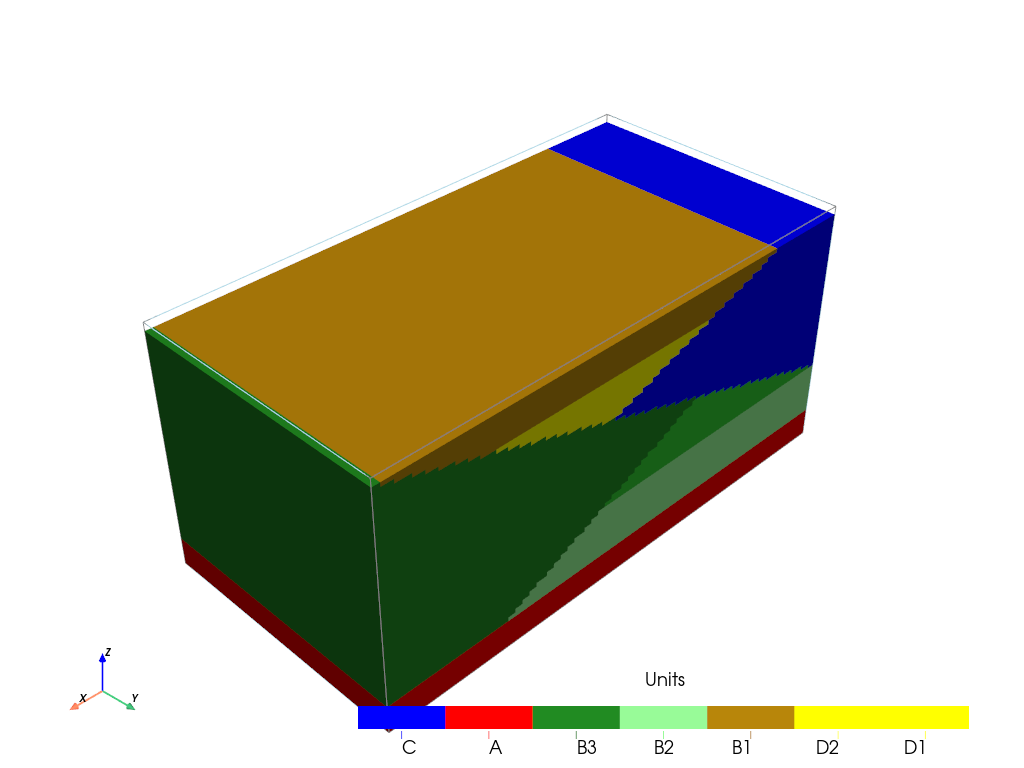

In [10]:
T1.plot_units()

Then you can proceed with your archpy model